# McKinney Chapter 11 - Practice - Sec 03

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
# %config InlineBackend.figure_format = 'retina'

## Announcements

1. Please propose and vote for students' choice topics [here](https://northeastern.instructure.com/courses/207607/discussion_topics/2622636) by Friday, 2/28, at 11:59 PM
2. Project 1 is due by Friday, 2/28, at 11:59 PM
    1. See the assignment [here](https://northeastern.instructure.com/courses/207607/assignments/2541687)
    2. Ask your questions [here](https://northeastern.instructure.com/courses/207607/discussion_topics/2708834)
    3. I will invite you to a peer review system---either Teammates or Feedback Fruits---as soon as I can

*Additional announcements for Friday, 2/21:*

1. Thanks for the week five feedback! Please see what your peers said and how I can help [here](https://northeastern.instructure.com/courses/207607/discussion_topics/2703847)
2. I completely removed spread and market impact calculations from Project 1 to avoid confusion with Reliant's use a spread, which is their rate relative to the interbank rate; more [here](https://northeastern.instructure.com/courses/207607/discussion_topics/2708834)
3. Class next week (2/25 and 2/28) is entirely group work

## Five-Minute Review

The time-series functionality in pandas is fantastic!
Here are the three main tools we will use:

1. `.shift()` method
    1. The `.shift()` method shifts the data in a series or data frame by a specified number of observations (or time periods with the `freq` argument).
    1. We will use it to get past or future (lagged or forward) characteristics, like returns, volatilities, or market capitalizations.
1. `.resample()` method
    1. The `.resample()` method resamples a series or data frame to decrease or increase its frequency (downsample or upsample).
    2. We will use it to calculate statistics (e.g., return means and standard deviations) for *non-overlapping windows*.
1. `.rolling()` method
    1. The `.rolling()` method performs rolling window calculations on a series or data frame.
    1. We will use it to calculate statistics (e.g., moving averages) for *overlapping windows*.

##  Practice

### Download daily returns for ten portfolios formed on book-to-market ratios

In [3]:
[i for i in pdr.famafrench.get_available_datasets() if ('BE-ME' in i) and ('Port' in i)][:5]

['Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Developed_6_Portfolios_ME_BE-ME',
 'Developed_6_Portfolios_ME_BE-ME_daily']

In [4]:
ff = pdr.DataReader(
    name='Portfolios_Formed_on_BE-ME_Daily',
    data_source='famafrench',
    start='1900'
)

C:\Users\r.herron\AppData\Local\Temp\ipykernel_14472\3411786515.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = pdr.DataReader(
C:\Users\r.herron\AppData\Local\Temp\ipykernel_14472\3411786515.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = pdr.DataReader(


With `data_source=famafrench`, `pdr.DataReader()` returns a dictionary of data frames.
The value for the `DESCR` key describes these data frames.

In [5]:
type(ff)

dict

In [6]:
print(ff['DESCR'])

Portfolios Formed on BE-ME Daily
--------------------------------

This file was created by CMPT_BEME_RETS_DAILY using the 202412 CRSP database. It contains value- and equal-weighted returns for portfolios formed on BE/ME. The portfolios are constructed at the end of June. BE/ME is book equity at the last fiscal year end of the prior calendar year divided by ME at the end of December of the prior year. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. The break points use Compustat firms plus the firms hand-collected from the Moodys Industrial, Utilities, Transportation, and Financial Manuals. The break points include utilities. The portfolios use Compustat firms plus the firms hand-collected from the Moodys Industrial, Utilities, Transportation, and Financial Manuals. The portfolios include utilities.

  0 : Value Weighted Returns -- Daily (25901 rows x 19 cols)
  1 : Equal Weighted Returns -- Daily (25901 rows x 19 cols)


In [7]:
bm = (
    ff[0]
    .iloc[:, -10:]
    .div(100)
    .rename_axis(columns='Portfolio')
)

bm

Portfolio,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,
1926-07-01,0.0014,0.0044,-0.0012,0.0009,0.0019,0.0038,-0.0032,-0.0011,0.0028,-0.0044
1926-07-02,0.0044,0.0043,0.0066,0.0044,0.0061,0.0015,0.0061,0.0019,0.0044,-0.0011
1926-07-06,0.0037,0.0000,0.0054,0.0027,0.0007,0.0004,-0.0002,-0.0043,0.0016,0.0012
1926-07-07,-0.0004,-0.0003,0.0032,0.0032,0.0001,0.0020,-0.0023,0.0059,0.0053,-0.0030
1926-07-08,0.0067,-0.0003,0.0030,0.0038,-0.0009,0.0027,-0.0003,0.0057,0.0025,0.0073
...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.0136,0.0106,0.0106,0.0086,0.0086,0.0053,0.0100,0.0103,0.0100,0.0125
2024-12-26,-0.0002,-0.0011,-0.0015,0.0020,0.0026,0.0016,0.0025,0.0019,0.0030,0.0089
2024-12-27,-0.0160,-0.0110,-0.0081,-0.0071,-0.0076,-0.0052,-0.0067,-0.0076,-0.0075,-0.0075


### Plot cumulative returns for all available data

Exponential growth appears as a straight line on a logarithmic scale.
We will express cumulative returns as the value of a $1 investment to avoid issues with the logarithm of negative values, which is undefined.

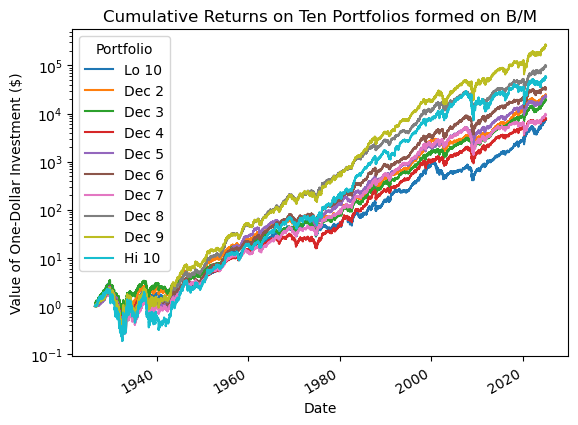

In [8]:
bm.add(1).cumprod().plot()

plt.ylabel('Value of One-Dollar Investment ($)')
plt.title('Cumulative Returns on Ten Portfolios formed on B/M')
plt.yscale('log')
plt.show()

### Calculate total returns for each calendar year

In [9]:
a = (  
    bm  
    .add(1)            # Convert simple returns into gross returns (1 + return)  
    .resample(rule='YE') # Resample data to yearly frequency ('YE' stands for Year-End), grouping by year  
    .prod()            # Compute the product of gross returns for each year to get total annual returns  
    .sub(1)            # Subtract 1 to convert gross returns back into simple returns  
)


In [10]:
a.head()

Portfolio,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,
1926-12-31,0.0819,0.0309,0.2793,0.0899,0.0248,0.0825,0.1265,0.1038,0.0510,0.0958
1927-12-31,0.5773,0.2518,0.4298,0.2015,0.2041,0.2611,0.2832,0.2471,0.3844,0.4825
1928-12-31,0.4880,0.4965,0.3961,0.3724,0.4677,0.2581,0.1484,0.3331,0.3740,0.2668
1929-12-31,-0.2691,-0.0844,-0.1469,-0.0664,-0.0039,-0.0147,-0.0096,-0.0830,-0.0830,-0.2550
1930-12-31,-0.2911,-0.2067,-0.2679,-0.2757,-0.2531,-0.3514,-0.3858,-0.4110,-0.5280,-0.5669


### Calculate total returns for *all* 252-trading-day windows (i.e., rolling returns)

The following code calculates rolling total returns over 252-trading-day windows (approximately one year).
Since `.rolling()` does not have a built-in `.prod()`, we must use `.apply()` with a lambda function.
The lambda function transforms returns into gross returns (1 + return), computes the product over the window, and then subtracts 1 to express the result as a simple return.

Also, when using an integer `window` with `.rolling()`, the `min_periods` parameter defaults to the window size.
Here `window=252`, so calculations will only begin once the full 252-day window is available.

In [11]:
%%time
a = (
    bm
    .rolling(window=252)  # Rolling window of 252 trading days (approx. one year)
    .apply(lambda x: (1 + x).prod() - 1)  # No .prod() for .rolling(), so we use .apply() with a lambda
    # The lambda converts returns to gross returns (1 + return), takes the product, then subtracts 1
)

CPU times: total: 44 s
Wall time: 44.6 s


In [12]:
a

Portfolio,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,
1926-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.4050,0.2251,0.3333,0.0983,0.2636,0.0363,0.2548,0.1525,0.2360,0.2177
2024-12-26,0.3997,0.2194,0.3257,0.0926,0.2599,0.0296,0.2510,0.1454,0.2216,0.2146
2024-12-27,0.3744,0.2032,0.3167,0.0830,0.2475,0.0228,0.2412,0.1322,0.2114,0.2014


The following code efficiently calculates rolling total returns over 252-trading-day windows by using log returns to improve computational speed.

1. Log transformation: `np.log1p(x)` applies the natural log to (1 + returns), converting simple returns into log returns. This makes summing returns equivalent to compounding them because the log of a product is the sum of the logs.
2. Summation: `.rolling(window=252).sum()` computes the sum of log returns over the rolling window. This is mathematically equivalent to taking the log of the total return.
3. Exponential transformation: `np.expm1(x)` reverses the log transformation, converting log total returns back into simple total returns.

The `.pipe()` method improves code readability.
It allows us to pass the series or data frame as the first argument to a function, avoiding the need for nested function calls.
We can use method chaining with `.pipe()`, making the code cleaner and easier to read.

In [13]:
%%time

b = (
    bm
    .pipe(np.log1p)  # Apply np.log1p(x), equivalent to np.log(1 + x), converting simple return to log return
    .rolling(window=252)  # Create a rolling window of 252 trading days (approx. one year)
    .sum()  # Sum log returns over the window to compute log total return
    .pipe(np.expm1)  # Apply np.expm1(x), equivalent to np.exp(x) - 1, converting log total return back to simple total return
)


CPU times: total: 31.2 ms
Wall time: 34.7 ms


In [14]:
b

Portfolio,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,
1926-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.4050,0.2251,0.3333,0.0983,0.2636,0.0363,0.2548,0.1525,0.2360,0.2177
2024-12-26,0.3997,0.2194,0.3257,0.0926,0.2599,0.0296,0.2510,0.1454,0.2216,0.2146
2024-12-27,0.3744,0.2032,0.3167,0.0830,0.2475,0.0228,0.2412,0.1322,0.2114,0.2014


In [15]:
np.allclose(a=a, b=b, equal_nan=True)

True

### Calculate total returns for 12-months windows with monthly data

The following code calculates total returns over **12-month rolling windows** using **monthly data**, using an efficient log-return-based approach.

1. `np.log1p(x)` transforms simple returns into log returns, and all calculations remain in log-return space.
2. `.resample(rule='ME').sum()` downsamples the data from daily to monthly returns by summing log returns within each month.
3. `.rolling(window=12).sum()` applies a 12-month rolling window, summing the log returns over the past 12 months.
4. `np.expm1(x)` converts log total returns back to simple returns.

This log-returns-based approach, method avoids expensive multiplications and it much faster than a product-based approach.

In [16]:
a = (
    bm
    .pipe(np.log1p)  # Convert to log returns and stay in log returns for all calculations
    .resample(rule='ME')  # Downsample from daily to monthly returns 
    .sum()  # ...by summing log returns within each month
    .rolling(window=12)  # Apply a rolling 12-month window
    .sum()  # Sum log returns over the 12-month window to compute total log return
    .pipe(np.expm1)  # Convert back to simple returns
)

In [17]:
a

Portfolio,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,
1926-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.3291,0.1739,0.2752,0.1209,0.3493,0.1576,0.2974,0.2579,0.3300,0.2854
2024-09-30,0.4477,0.2652,0.4019,0.1915,0.3747,0.2293,0.3351,0.3001,0.3626,0.3446
2024-10-31,0.4565,0.2712,0.4598,0.2394,0.4127,0.2464,0.3971,0.3464,0.4824,0.4768


These 12-month rolling returns are still noisy but show the business cycle.

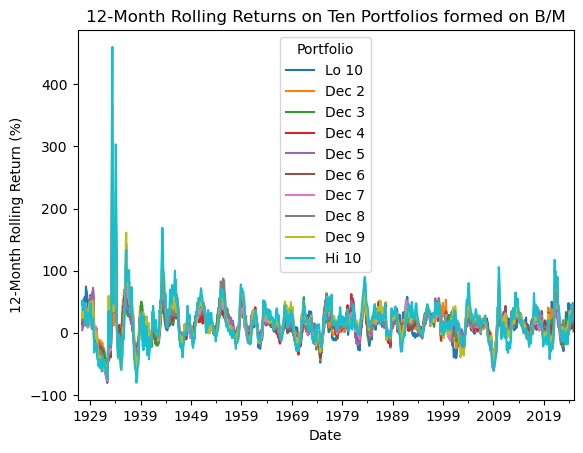

In [18]:
a.mul(100).plot()

plt.ylabel('12-Month Rolling Return (%)')
plt.title('12-Month Rolling Returns on Ten Portfolios formed on B/M')
plt.show()

We can modify the code to above to smooth out this noise with 36-month rolling returns.

In [19]:
b = (
    bm
    .pipe(np.log1p)  # Convert to log returns and stay in log returns for all calculations
    .resample(rule='ME')  # Downsample from daily to monthly returns 
    .sum()  # ...by summing log returns within each month
    .rolling(window=36)  # Apply a rolling 36-month window
    .sum()  # Sum log returns over the 36-month window to compute total log return
    .pipe(np.expm1)  # Convert back to simple returns
)

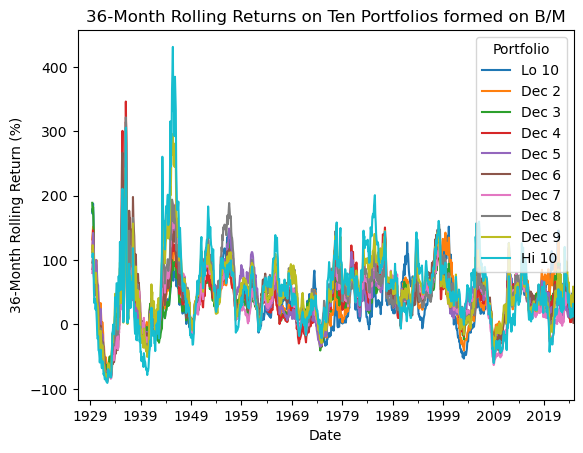

In [20]:
b.mul(100).plot()

plt.ylabel('36-Month Rolling Return (%)')
plt.title('36-Month Rolling Returns on Ten Portfolios formed on B/M')
plt.show()

### Calculate Sharpe Ratios for each calendar year

The Sharpe Ratio of portfolio $p$ is $S_p = \frac{\overline{r_p - r_f}}{\sigma_p}$, where $\overline{r_p-r_f}$ is mean portfolio excess return over some period and $\sigma_i$ is the standard deviation of excess returns over the same period.

First, we need to the risk-free rate $r_f$, which is `RF` in the Fama-French factors.

In [21]:
ff_2 = pdr.DataReader(
    name='F-F_Research_Data_Factors_daily',
    data_source='famafrench',
    start='1900'
)

C:\Users\r.herron\AppData\Local\Temp\ipykernel_14472\3151066598.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_2 = pdr.DataReader(


In [22]:
factors = ff_2[0].div(100)

We can calculate portfolio excess returns (i.e., $r_p - r_f$) once and use them for the rest of the notebook.
Note we use `sub()` with `axis=1` to properly align `bm` and `ff['RF']`.

In [23]:
bm_excess = bm.sub(factors['RF'], axis=0)

We can calculate the *full sample* Sharpe ratio first, one of two ways.
I prefer the `.apply()` approach because we can easily extend it with `.resample()` or `.rolling()`.

In [24]:
a = np.sqrt(252) * bm_excess.mean() / bm_excess.std()

In [25]:
b = bm_excess.apply(lambda x: np.sqrt(252) * x.mean() / x.std())

In [26]:
a.equals(b)

True

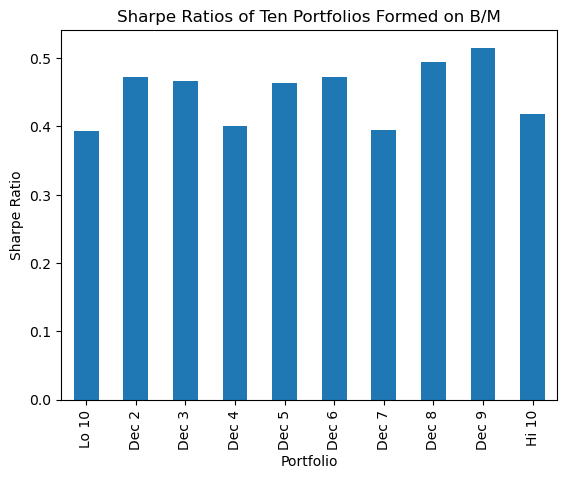

In [27]:
a.plot(kind='bar')

plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios of Ten Portfolios Formed on B/M')
plt.show()

Now we can insert `.resample(rule='YE')` between `bm_excess` and `.apply()` to calculate Sharpe for each portfolio each year.
These Sharpe ratios are noisy because a one-year mean excess returns is a poor estimate of the expected risk premium.

In [28]:
bm_excess.resample(rule='YE').apply(lambda x: np.sqrt(252) * x.mean() / x.std())

Portfolio,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,
1926-12-31,1.0443,0.3296,2.4042,1.9237,0.2085,1.3751,1.4400,1.3200,0.5276,1.0035
1927-12-31,3.2226,1.8649,2.6625,1.7466,1.6240,2.1109,1.8806,1.6189,1.8466,1.6684
1928-12-31,1.9391,2.1740,2.2007,1.9249,2.1844,1.5118,0.8999,1.6722,1.3630,0.9255
1929-12-31,-0.6050,-0.1397,-0.2468,-0.1714,0.0009,-0.0349,-0.0684,-0.3532,-0.2792,-0.6170
1930-12-31,-0.9699,-0.7385,-1.0907,-1.3742,-1.3992,-1.6457,-2.3018,-2.0655,-2.3736,-2.1651
...,...,...,...,...,...,...,...,...,...,...
2020-12-31,1.2642,0.9832,0.7619,0.5393,0.3580,0.3959,-0.2282,0.1763,0.2887,0.0855
2021-12-31,1.2897,1.5874,1.9123,1.2979,0.9096,1.7676,1.4498,1.8130,1.5930,1.6392
2022-12-31,-0.9784,-0.9136,-0.8109,-0.3785,-0.4498,-0.6707,-0.0387,0.3956,0.0459,-0.0850


We can smooth out these noisy Sharpe ratios with 10-year windows, but there is not a clear pattern.
We will revisit this idea when we study the CAPM and quantitative value investing.

In [29]:
(
    bm_excess  # DataFrame or Series containing excess returns (benchmark returns minus risk-free rate)
    .groupby(lambda x: f'{10 * (x.year // 10)}s')  # Groups data by decade
        # lambda x: creates an anonymous function that takes each index (x)
        # x.year // 10: integer division of year by 10 (e.g., 1995 // 10 = 199)
        # 10 * (...): multiplies by 10 to get decade start (e.g., 1990)
        # f'...s': formats as string with 's' suffix (e.g., '1990s')
    .apply(lambda x: np.sqrt(252) * x.mean() / x.std())  # Calculates annualized Sharpe ratio per decade
        # lambda x: applies function to each decade group
        # x.mean(): calculates average daily excess return for the decade
        # x.std(): calculates standard deviation of daily excess returns
        # np.sqrt(252): annualization factor (assuming 252 trading days per year)
        # Sharpe ratio = (mean return / volatility) * annualization factor
)

Portfolio,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,
1920s,0.6246,0.6083,0.7895,0.6107,0.7074,0.6402,0.6380,0.6673,0.6845,0.4149
1930s,0.1178,0.2105,0.2038,0.0833,0.0080,0.1001,0.0443,0.1341,0.1414,0.0770
1940s,0.4820,0.6183,0.4020,0.6673,0.8076,0.7309,0.7331,0.8653,0.9167,0.6632
1950s,1.4480,1.2289,1.2221,1.4239,1.8591,1.5216,1.0853,1.6076,1.3213,1.1307
1960s,0.3868,0.4849,0.2797,0.1467,0.4387,0.7229,0.5657,0.8162,0.7368,0.5445
1970s,-0.1963,-0.0369,0.1804,0.1371,0.1975,0.3276,0.4123,0.5343,0.5162,0.5490
1980s,0.2477,0.5324,0.4726,0.5419,0.4410,0.6223,0.6927,0.6127,0.8693,0.9640
1990s,0.8920,0.9738,0.7868,0.7894,0.7052,0.7672,0.7818,0.8722,0.9672,0.8542
2000s,-0.1598,0.0319,0.1571,0.1537,0.2752,0.2740,0.0643,0.1734,0.3230,0.3032


### Calculate rolling betas

We can calculate CAPM betas as: $\beta_i = \frac{Cov(r_i - r_f, r_M - r_f)}{Var(r_M - r_f)}$

The simplest approach is also the fastest approach!
This approach uses the the `.cov()` and `.var()` methods, which are optimized for `.rolling()`.

In [30]:
cov_term = bm_excess.rolling(window=3*252).cov(factors['Mkt-RF'])
var_term = factors['Mkt-RF'].rolling(window=3*252).var()
a = cov_term.div(var_term, axis=0)

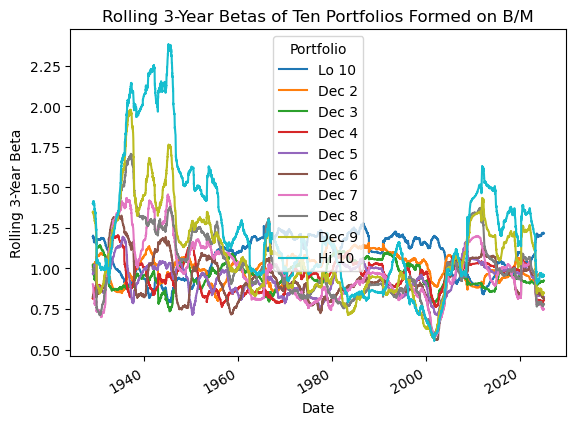

In [31]:
a.plot()

plt.ylabel('Rolling 3-Year Beta')
plt.title('Rolling 3-Year Betas of Ten Portfolios Formed on B/M')
plt.show()

We could probably figure out an `.apply()` solution but it would be slower (because `.apply()` is not optimized) and unintuitive (because the it would have to combine portfolio excess returns with market excess returns).

### Calculate rolling Sharpe Ratios

We can copy our Sharpe ratio code above, replacing the `.resample()`s with `.rolling()`s!
The "unwrapped" version that calculates means and standard deviations separately is much faster!

In [32]:
%%time
a = np.sqrt(252) * bm_excess.rolling(window=3*252).mean() / bm_excess.rolling(window=3*252).std()

CPU times: total: 31.2 ms
Wall time: 42.5 ms


In [33]:
%%time
b = bm_excess.rolling(window=3*252).apply(lambda x: np.sqrt(252) * x.mean() / x.std())

CPU times: total: 1min 17s
Wall time: 1min 18s


In [34]:
np.allclose(a=a, b=b, equal_nan=True)

True

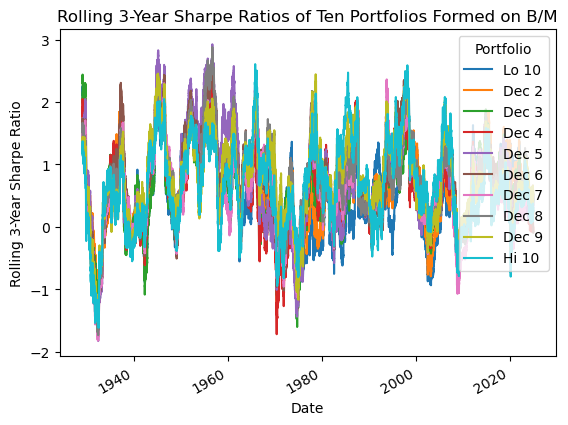

In [35]:
a.plot()

plt.ylabel('Rolling 3-Year Sharpe Ratio')
plt.title('Rolling 3-Year Sharpe Ratios of Ten Portfolios Formed on B/M')
plt.show()

### Calculate drawdowns

Drawdown is the percent decline from a historical peak to a current value: $\text{Drawdown}_t = \frac{P_t}{P_t^{\text{max}}} - 1$, where $P_t$ is the value at time $t$, and $P_t^{\text{max}}$ is the highest value up to time $t$.

We must infer prices from returns: $P_T = P_0 \times \product_{t=1}^T (1 + r_t)$

In [36]:
bm_prices = bm.add(1).cumprod()
drawdowns = bm_prices / bm_prices.cummax() - 1

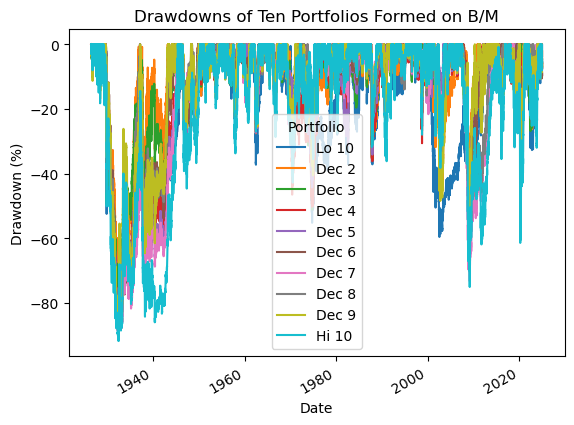

In [37]:
drawdowns.mul(100).plot()

plt.ylabel('Drawdown (%)')
plt.title('Drawdowns of Ten Portfolios Formed on B/M')
plt.show()

### Calculate maximum drawdowns *by decade*

The plot above is noisy and difficult to interpret.
It might help to find the maximum drawdowns (really the minimum of the negative value) *by decade*.

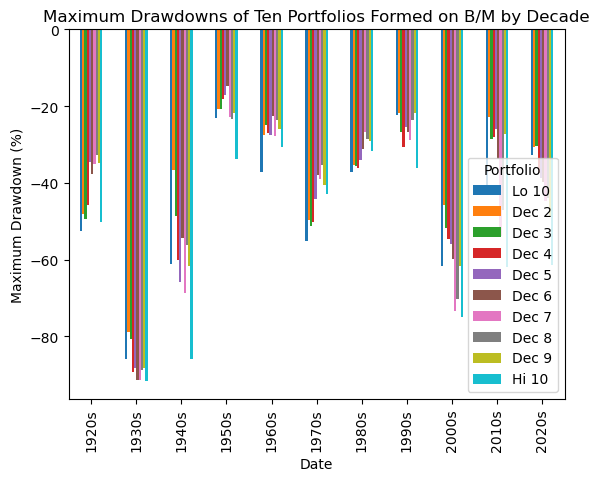

In [38]:
(
    drawdowns  # DataFrame or Series containing drawdown values (typically negative)
    .groupby(lambda x: f'{10 * (x.year // 10)}s')  # Groups data by decade
        # lambda x: creates an anonymous function that takes each index (x)
        # x.year // 10: integer division of year by 10 (e.g., 1995 // 10 = 199)
        # 10 * (...): multiplies by 10 to get decade start (e.g., 1990)
        # f'...s': formats as string with 's' suffix (e.g., '1990s')
    .min()  # Finds the minimum value (maximum drawdown) for each decade
        # Since drawdowns are typically negative, min() gives the largest loss
    .mul(100)  # Multiplies by 100 to convert to percentage
        # e.g., -0.25 becomes -25 (representing -25%)
    .plot(kind='bar')  # Creates a bar plot of maximum drawdowns by decade
        # x-axis: decades (e.g., '1990s', '2000s')
        # y-axis: maximum drawdown percentages (negative values)
)

plt.ylabel('Maximum Drawdown (%)')
plt.title('Maximum Drawdowns of Ten Portfolios Formed on B/M by Decade')
plt.show()

That is still noisy!
We can plot the full-sample values.
They are similar across the ten portfolios, but higher B/M stocks (deeper value stocks) tend to have larger drawdowns.

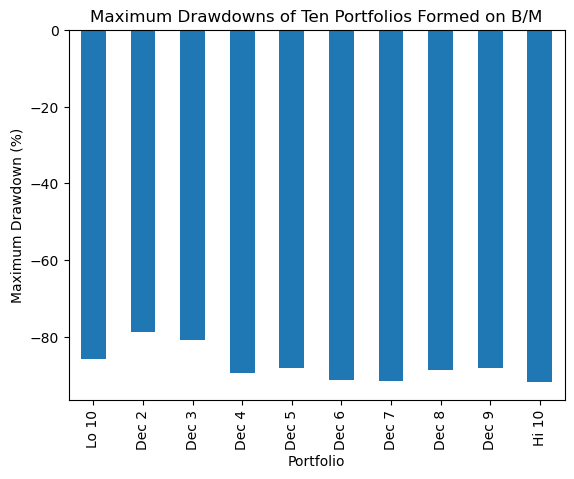

In [39]:
(
    drawdowns  # Series/DataFrame of drawdown values
    .min()  # Gets maximum drawdown (most negative value)
    .mul(100)  # Converts to percentage
    .plot(kind='bar')  # Plots as bar chart
)

plt.ylabel('Maximum Drawdown (%)')
plt.title('Maximum Drawdowns of Ten Portfolios Formed on B/M')
plt.show()

### Determine if rebalancing increases returns using the `Lo 10` and `Hi 10` portfolios

You might compare total *dollar* returns with rebalancing: never, every 10 years, every 5 years, every 1 year, every 1 month, and every 1 day.
Why does this work!
More [here](https://www.morningstar.com/columns/rekenthaler-report/when-rebalancing-creates-higher-returnsand-when-it-doesnt).

In [40]:
portfolios = ['Lo 10', 'Hi 10']

I wrote a function to replace our code from class

```python
rebalancing = pd.Series({
    'Daily': bm[portfolios].mean(axis=1).add(1).prod(),
    'Monthly': bm[portfolios].add(1).resample(rule='ME').prod().mean(axis=1).prod(),
    'Yearly': bm[portfolios].add(1).resample(rule='YE').prod().mean(axis=1).prod(),
    '5 Years': bm[portfolios].add(1).resample(rule='5YE').prod().mean(axis=1).prod(),
    '10 Years': bm[portfolios].add(1).resample(rule='10YE').prod().mean(axis=1).prod(),
    'Never': bm[portfolios].add(1).prod().mean()
})
```

In [41]:
def calc_rebalanced_return(returns, portfolios, frequencies):
    # Initialize empty dictionary for results
    rebalanced = {}
    
    # Gross portfolio returns (add 1 for compounding)
    returns_gross = returns[portfolios].add(1)
    
    # Calculate returns for each frequency
    for freq in frequencies:
        if freq == 'Never':  # No rebalancing
            rebalanced[freq] = returns_gross.prod().mean()
        else:  # All other frequencies (Daily, Monthly, Yearly, etc.)
            rebalanced[freq] = returns_gross.resample(rule=freq).prod().mean(axis=1).prod()
    
    # Return as pandas Series
    return pd.Series(rebalanced)

In [42]:
from matplotlib.ticker import StrMethodFormatter

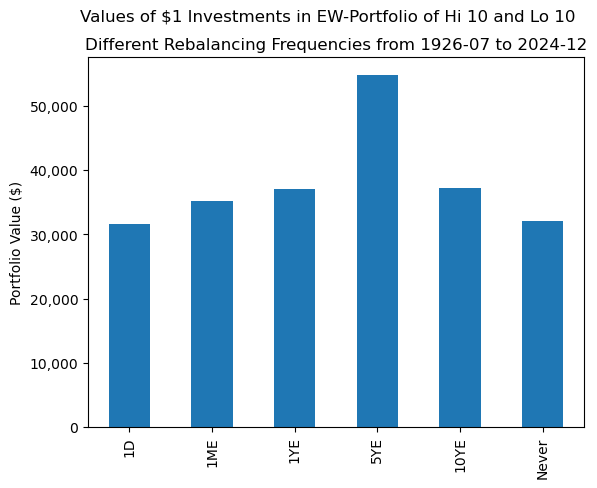

In [43]:
ax = (
    calc_rebalanced_return(
        returns=bm,
        portfolios=portfolios,
        frequencies=['1D', '1ME', '1YE', '5YE', '10YE', 'Never']
    )
    .plot(kind='bar')
)

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # 2 decimal places with commas

plt.ylabel('Portfolio Value ($)')
plt.suptitle('Values of $1 Investments in EW-Portfolio of Hi 10 and Lo 10')
plt.title('Different Rebalancing Frequencies from 1926-07 to 2024-12')
plt.show()

In class, we discussed that the maximum value occurs at `5YE` becuase the correlation between `Hi 10` and `Lo 10` is very low at this returns frequency.
We can modify our function above to return correlations instead of total values.

In [44]:
def calc_rebalanced_corr(returns, portfolios, frequencies):
    # Initialize empty dictionary for results
    correlations = {}
    
    # Daily returns (raw returns for correlation)
    returns_daily = returns[portfolios]
    
    # Verify exactly 2 portfolios for correlation
    if len(portfolios) != 2:
        raise ValueError("Correlation calculation requires exactly 2 portfolios")
    
    # Calculate correlations for each frequency
    for freq in frequencies:
        # Calculate period-by-period returns with rebalancing
        period_returns = returns_daily.resample(rule=freq).sum()
        correlations[freq] = period_returns.corr().iloc[0,1]
    
    # Return as pandas Series
    return pd.Series(correlations)


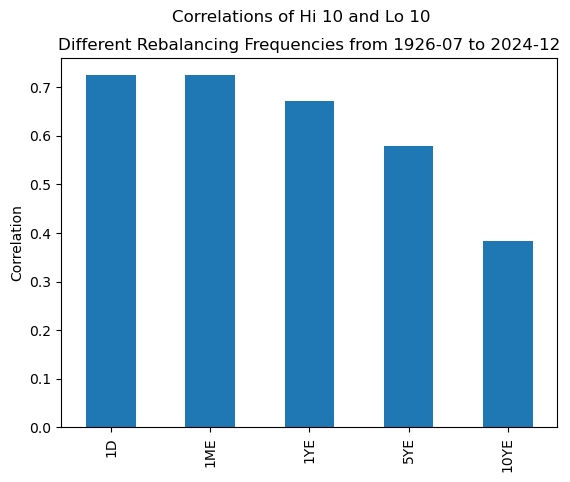

In [45]:
ax = (
    calc_rebalanced_corr(
        returns=bm,
        portfolios=portfolios,
        frequencies=['1D', '1ME', '1YE', '5YE', '10YE']
    )
    .plot(kind='bar')
)


plt.ylabel('Correlation')
plt.suptitle('Correlations of Hi 10 and Lo 10')
plt.title('Different Rebalancing Frequencies from 1926-07 to 2024-12')
plt.show()

But $\rho(10YE) < \rho(5YE)$!
The `5YE` total return must benefit from some excellent timing in addition the benefits of diversification!